**Write a program to predict the age of the person**

In [27]:
import numpy as np
import pandas as pd

In [28]:
df=pd.read_csv("weight-height-age.csv")
df.head(5)

,Unnamed: 0,Gender,Height,Weight,age
0,0,Male,73.847017,241.893563,64
1,1,Male,68.781904,162.310473,28
2,2,Male,74.110105,212.740856,48
3,3,Male,71.730978,220.042470,59
4,4,Male,69.881796,206.349801,49


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2001 non-null   int64  
 1   Gender      2001 non-null   object 
 2   Height      2001 non-null   float64
 3   Weight      2001 non-null   float64
 4   age         2001 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 78.3+ KB


In [30]:
df.describe()

,Unnamed: 0,Height,Weight,age
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,1000.000000,66.318402,161.575297,46.562719
std,577.783264,3.774648,31.631666,12.950644
min,0.000000,54.263133,64.700127,25.000000
25%,500.000000,63.573252,136.495860,35.000000
50%,1000.000000,66.172652,160.991990,47.000000
75%,1500.000000,69.058885,187.402531,57.000000
max,2000.000000,78.095867,255.690835,69.000000


In [31]:
import matplotlib.pyplot as plt
print(df.groupby('age')['Height'].mean())
print(df.groupby('age')['Weight'].mean())
print(df.groupby('age')['Gender'].count())


age
25    65.982257
26    66.993957
27    66.196656
28    66.008822
29    66.266930
30    66.948619
31    66.864139
32    65.974800
33    67.148217
34    66.531504
35    66.018907
36    66.244463
37    66.995260
38    66.439498
39    66.908072
40    65.621783
41    67.119440
42    66.068820
43    66.201214
44    65.946542
45    66.103259
46    66.166644
47    66.377809
48    66.814180
49    66.722305
50    66.404958
51    66.487505
52    66.323959
53    66.663904
54    65.661374
55    65.908430
56    65.247718
57    67.097235
58    65.067562
59    66.935104
60    65.618404
61    66.285445
62    66.295955
63    65.261410
64    66.379525
65    66.051623
66    67.099649
67    66.584765
68    65.519711
69    65.866429
Name: Height, dtype: float64
age
25    158.702293
26    165.645823
27    162.037619
28    158.605884
29    159.952545
30    166.081156
31    162.714622
32    161.759245
33    170.113634
34    160.913421
35    157.326123
36    162.296711
37    165.655275
38    160.853445
39   

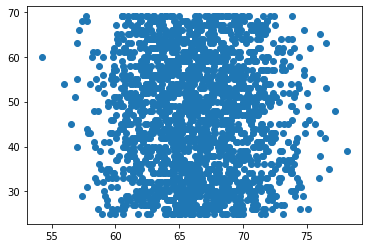

In [32]:
plt.scatter(df['Height'],df['age'])

In [33]:
pd.crosstab(df['Gender'],[df['Height']])

Height,54.263133,55.979198,56.534166,56.822240,56.975279,56.994456,57.028857,57.165840,57.353093,57.375759,...,75.944460,76.012300,76.021347,76.027082,76.434559,76.492934,76.501883,76.709835,77.160801,78.095867
Gender,,,,,,,,,,,,,,,,,,,,,
Female,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Male,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [40]:
df=pd.get_dummies(df)
print(df.columns)
X=df[['Weight']]
Y=df[['age']]

print(X.shape)
print(Y.shape)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) 
from sklearn.neighbors import KNeighborsClassifier

Index(['Unnamed: 0', 'Height', 'Weight', 'age', 'Gender_Female',
       'Gender_Male'],
      dtype='object')
(2001, 1)
(2001, 1)


In [41]:
svc=KNeighborsClassifier()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

<ipython-input-41-4b8fc458fc12>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  svc.fit(X_train,y_train)


In [42]:
from sklearn.metrics import accuracy_score
print("Accuracy Score",accuracy_score(y_pred,y_test))

Accuracy Score 0.022443890274314215
